In [23]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [24]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def lower_bound(n,d):
    if n > 50:
        return d * np.log2(n/d)
    else:        
        return np.log2(sum([ncr(n,i) for i in range(0,d+1)]))

In [25]:
# Random measurments load results

result = {}
for n in [16, 32, 64, 128]:
    n = 3*n //2
    result[n] = {}
    for degree in [2, 3, 4, 5]:
        result[n][degree] = {}
        my_range = np.linspace(0.1 * degree*np.log2(n), 2.5 * degree*np.log2(n), 40)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(10):
                try:
                    f =open(f"results/n={n}_m={m}_d={degree}_{try_no}.json")
                    data = json.loads(f.read())
                    result[n][degree][m].append(data)
                except:
                    print(f"Couldn't find results/n={n}_m={m}_d={degree}_{try_no}.json")
                    #print(f"Assume job failed")
                    #data = {'status': False, 'time':60*60*4, 'n': n, 'm': m, 'd': degree}
                    #result[n][degree][m].append(data)
                        

In [29]:
for n in result:
    for degree in result[n]:
        for m in result[n][degree]:
            for j in range(10):
                if not result[n][degree][m][j]["solution_has_correct_degree"] or not result[n][degree][m][j]["solution_satisfies_constraints"]:
                    print(result[n][degree][m][j],j)

{'model_status': 'optimal', 'solution_has_correct_degree': True, 'solution_satisfies_constraints': False, 'equal': False, 'time': 0.041749000549316406, 'n': 24, 'm': 10, 'd': 4, 'optimize_failed': False} 6
{'model_status': 'optimal', 'solution_has_correct_degree': True, 'solution_satisfies_constraints': False, 'equal': False, 'time': 0.07452845573425293, 'n': 24, 'm': 13, 'd': 5, 'optimize_failed': False} 9
{'model_status': 'optimal', 'solution_has_correct_degree': True, 'solution_satisfies_constraints': False, 'equal': False, 'time': 0.05341219902038574, 'n': 48, 'm': 14, 'd': 2, 'optimize_failed': False} 1
{'model_status': 'optimal', 'solution_has_correct_degree': True, 'solution_satisfies_constraints': False, 'equal': False, 'time': 0.04303908348083496, 'n': 48, 'm': 17, 'd': 2, 'optimize_failed': False} 2
{'model_status': 'optimal', 'solution_has_correct_degree': True, 'solution_satisfies_constraints': False, 'equal': False, 'time': 0.06415200233459473, 'n': 48, 'm': 19, 'd': 2, 'o

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.6, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.03870224952697754, 0.09807789325714111, 0.09947705268859863, 0.005348086357116699, 0.00993335247039795, 0.03407156467437744, 0.021609783172607422, 0.04814040660858154, 0.023102879524230957, 0.015209078788757324, 0.01623702049255371, 0.02345120906829834, 0.029812216758728027, 0.028207063674926758, 0.01545870304107666, 0.01978898048400879, 0.01987600326538086, 0.013693690299987793, 0.02151775360107422, 0.02395641803741455, 0.018689870834350586, 0.011639833450317383, 0.006527304649353027]


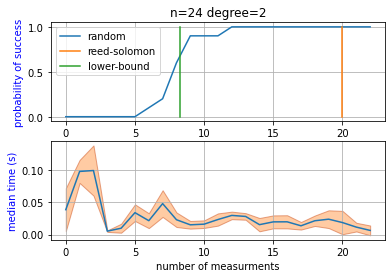

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.5, 0.4, 0.5, 0.6, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.007828116416931152, 0.01834845542907715, 0.01942312717437744, 0.017727017402648926, 0.014261722564697266, 0.025768280029296875, 0.014686346054077148, 0.022036075592041016, 0.026601552963256836, 0.03221309185028076, 0.02293860912322998, 0.027124404907226562, 0.03239738941192627, 0.03400695323944092, 0.026599645614624023, 0.025574922561645508, 0.03516805171966553, 0.01891171932220459, 0.017363667488098145, 0.02063608169555664, 0.026676535606384277, 0.021414995193481445, 0.022928476333618164, 0.028538107872009277, 0.020188093185424805, 0.007114052772521973, 0.011294126510620117, 0.005834341049194336, 0.012981534004211426, 0.00939023494720459, 0.014651179313659668, 0.012265324592590332, 0.01561427116394043, 0.005457639694213867]


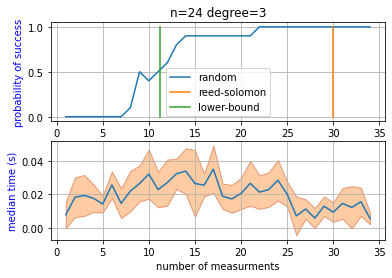

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.007221817970275879, 0.0053577423095703125, 0.006869912147521973, 0.005064964294433594, 0.01952505111694336, 0.020463109016418457, 0.020648479461669922, 0.03274083137512207, 0.0393071174621582, 0.041939735412597656, 0.056018948554992676, 0.056250810623168945, 0.06010770797729492, 0.05931878089904785, 0.061270833015441895, 0.048473358154296875, 0.04071509838104248, 0.040976524353027344, 0.04869115352630615, 0.034343838691711426, 0.020332694053649902, 0.01712203025817871, 0.015594840049743652, 0.012601017951965332, 0.013143658638000488, 0.02977728843688965, 0.010848045349121094, 0.019040584564208984, 0.024332523345947266, 0.011721253395080566, 0.012520670890808105, 0.0381549596786499, 0.04544079303741455, 0.043135881423950195, 0.032477498054504395, 0.05376577377319336, 0.03688538074493408

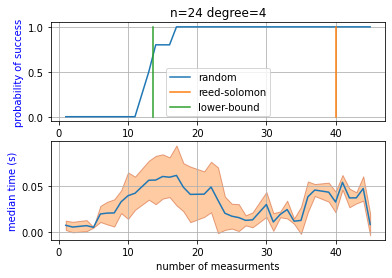

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.2, 0.6, 0.8, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.006238102912902832, 0.008167505264282227, 0.00904858112335205, 0.025946974754333496, 0.038443803787231445, 0.06484091281890869, 0.04615914821624756, 0.08653831481933594, 0.1117715835571289, 0.11754286289215088, 0.11998236179351807, 0.07997846603393555, 0.0773850679397583, 0.08598923683166504, 0.06828653812408447, 0.05196261405944824, 0.0422360897064209, 0.015424251556396484, 0.03404974937438965, 0.029126644134521484, 0.023119807243347168, 0.011808514595031738, 0.019190669059753418, 0.01607644557952881, 0.015327930450439453, 0.023229122161865234, 0.016120195388793945, 0.025778770446777344, 0.04311418533325195, 0.016047358512878418, 0.01669156551361084, 0.01098167896270752, 0.017617225646972656, 0.01868283748626709, 0.02288341522216797, 0.026093482971191406, 0.025943279266357422, 0.02431

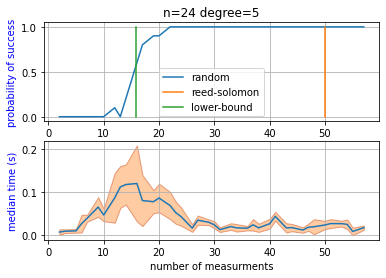

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.6, 0.7, 1.0, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0] [0.048323869705200195, 0.04646003246307373, 0.05616593360900879, 0.036026835441589355, 0.04836571216583252, 0.02622532844543457, 0.0240858793258667, 0.04902386665344238, 0.052800774574279785, 0.06725358963012695, 0.07459104061126709, 0.08697128295898438, 0.052643775939941406, 0.028049826622009277, 0.04109466075897217, 0.03250682353973389, 0.047690629959106445, 0.05806851387023926, 0.061791062355041504, 0.08792376518249512, 0.05553019046783447, 0.049144625663757324, 0.0318523645401001, 0.027673721313476562, 0.03529095649719238, 0.03124701976776123, 0.043491482734680176]


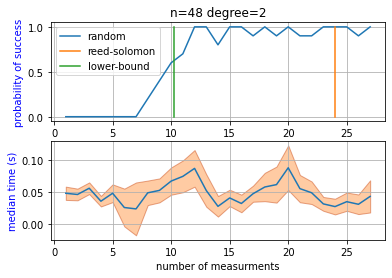

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.019318819046020508, 0.024329423904418945, 0.0333251953125, 0.019551753997802734, 0.041736721992492676, 0.03789162635803223, 0.049028754234313965, 0.04835677146911621, 0.05256485939025879, 0.06286144256591797, 0.0795128345489502, 0.12675106525421143, 0.13601553440093994, 0.14868640899658203, 0.21203625202178955, 0.20944762229919434, 0.2116159200668335, 0.22349202632904053, 0.17599475383758545, 0.15131378173828125, 0.12786686420440674, 0.12553751468658447, 0.1135561466217041, 0.12412750720977783, 0.15048670768737793, 0.1075829267501831, 0.10728752613067627, 0.09742772579193115, 0.13276135921478271, 0.11072444915771484, 0.1460362672805786, 0.11772382259368896, 0.12328612804412842, 0.08116114139556885, 0.052521705627441406, 0.05092167854309082, 0.07094573974609375, 0.04996073246002197, 0.0

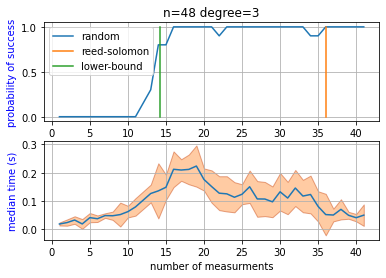

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.4, 0.5, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.04976963996887207, 0.018099308013916016, 0.017361044883728027, 0.02865779399871826, 0.032054901123046875, 0.030324459075927734, 0.04496574401855469, 0.06386232376098633, 0.1761786937713623, 0.31382107734680176, 0.2965356111526489, 0.3674020767211914, 0.3317457437515259, 0.48877739906311035, 0.375851035118103, 0.38936638832092285, 0.3606299161911011, 0.45825839042663574, 0.3812006711959839, 0.36545586585998535, 0.3718301057815552, 0.31201350688934326, 0.3277127742767334, 0.320695161819458, 0.25602495670318604, 0.35138165950775146, 0.2630668878555298, 0.2347332239151001, 0.2076880931854248, 0.18650484085083008, 0.17048263549804688, 0.15095901489257812, 0.13231706619262695, 0.1452324390411377, 0.07937145233154297, 0.04422497749328613, 0.030983567237854004, 0.02926170825958252, 0.039813756

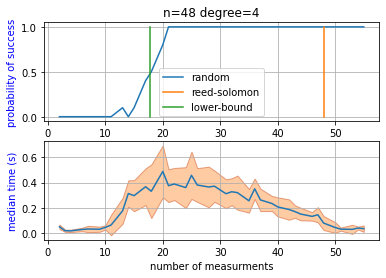

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.4, 0.8, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.04932212829589844, 0.034966349601745605, 0.044173598289489746, 0.03784501552581787, 0.06901514530181885, 0.12033021450042725, 0.17125427722930908, 0.2393254041671753, 0.3369712829589844, 0.5769145488739014, 0.6693689823150635, 1.1458460092544556, 1.3207435607910156, 1.1046308279037476, 1.022228717803955, 0.986514687538147, 0.7726045846939087, 0.9400259256362915, 0.8177757263183594, 0.7336157560348511, 0.6166164875030518, 0.5833406448364258, 0.3186471462249756, 0.2967085838317871, 0.25731194019317627, 0.20682382583618164, 0.175675630569458, 0.04258465766906738, 0.055434226989746094, 0.027657151222229004, 0.032225728034973145, 0.04207730293273926, 0.03155720233917236, 0.039505839347839355, 0.03344416618347168, 0.051866888999938965, 0.046904802322387695, 0.029947519302368164, 0.0337867736

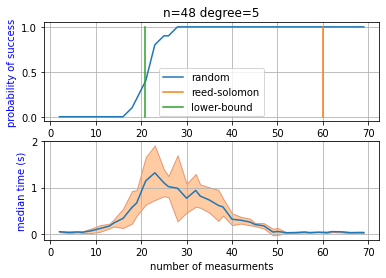

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.9, 0.8, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0] [0.04030430316925049, 0.04895508289337158, 0.022417068481445312, 0.04777562618255615, 0.04184401035308838, 0.04147148132324219, 0.06286251544952393, 0.0700531005859375, 0.0825657844543457, 0.1060565710067749, 0.1051032543182373, 0.11331391334533691, 0.1170506477355957, 0.12166893482208252, 0.12622451782226562, 0.13820219039916992, 0.09364986419677734, 0.14718759059906006, 0.1353682279586792, 0.1553267240524292, 0.11818933486938477, 0.11740398406982422, 0.10327863693237305, 0.05648303031921387, 0.07443130016326904, 0.07537484169006348, 0.07142055034637451, 0.09050583839416504, 0.07397317886352539, 0.08122730255126953, 0.08211886882781982, 0.1263892650604248]


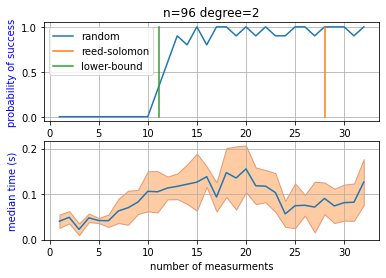

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.4, 0.3, 0.6, 0.8, 0.8, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8] [0.044956088066101074, 0.04829537868499756, 0.04397988319396973, 0.04587364196777344, 0.049504876136779785, 0.056896328926086426, 0.06968069076538086, 0.08701956272125244, 0.15237200260162354, 0.1720740795135498, 0.24286329746246338, 0.3109649419784546, 0.3043951988220215, 0.24761736392974854, 0.3385298252105713, 0.3641091585159302, 0.44808852672576904, 0.40573763847351074, 0.45427143573760986, 0.40041613578796387, 0.6011655330657959, 0.6052933931350708, 0.4872044324874878, 0.4474186897277832, 0.5537393093109131, 0.6210670471191406, 0.5608232021331787, 0.6315908432006836, 0.6153054237365723, 0.5027245283126831, 0.5022932291030884, 0.37604260444641113, 0.5099948644638062, 0.6483808755874634, 0.597902774810791, 0.5343054533004761, 0.4963260889053345, 0.49082839488983154, 0.3999279737472534,

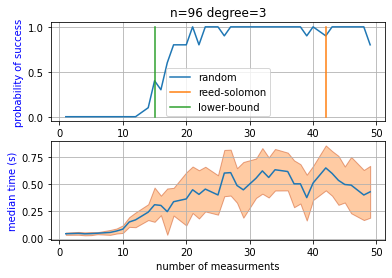

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.6, 0.9, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.04087352752685547, 0.042643189430236816, 0.009592652320861816, 0.023339271545410156, 0.023779988288879395, 0.027661800384521484, 0.11949574947357178, 0.24400842189788818, 0.3269609212875366, 0.6122634410858154, 1.0416117906570435, 2.303548812866211, 4.081499338150024, 2.887961983680725, 3.1056785583496094, 2.1279913187026978, 3.5490180253982544, 2.705387830734253, 2.7160199880599976, 2.015035629272461, 2.268139362335205, 2.6508560180664062, 2.166711211204529, 3.617630362510681, 1.965942621231079, 1.7428317070007324, 1.6472266912460327, 1.3585635423660278, 1.345709204673767, 1.5424855947494507, 2.231748938560486, 1.5630772113800049, 1.2661242485046387, 1.651871681213379, 1.8405848741531372, 1.4278620481491089, 1.3151918649673462, 1.6129906177520752, 1.8891363143920898, 1.160241127014160

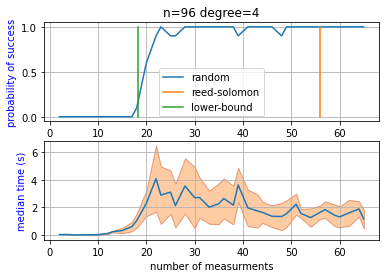

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.016904115676879883, 0.010752320289611816, 0.024600625038146973, 0.0268707275390625, 0.0823831558227539, 0.20139038562774658, 0.29437339305877686, 0.5463706254959106, 1.5000299215316772, 3.3180177211761475, 7.319990515708923, 8.701960802078247, 10.627431869506836, 11.65158236026764, 12.477948665618896, 8.92408549785614, 11.399675607681274, 10.651093006134033, 8.186736464500427, 9.215280055999756, 8.19626784324646, 7.129168748855591, 8.635348200798035, 5.213187098503113, 4.5288896560668945, 4.436855912208557, 3.7093777656555176, 5.40047550201416, 3.7089502811431885, 3.504967451095581, 3.1603105068206787, 4.330891370773315, 3.198203444480896, 4.045135140419006, 3.4012839794158936, 3.180484890937805, 3.137055277824402, 2.7983123064041138, 2.5991997718811035, 2.748700499534607]


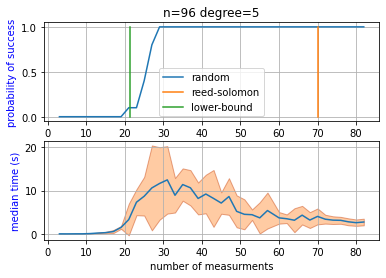

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.8, 0.6, 0.7, 0.9, 0.6, 0.9, 0.7, 0.5, 0.9, 0.6, 0.9, 1.0, 1.0, 0.8, 0.9, 0.8, 0.8, 0.7, 0.7, 1.0, 0.9, 0.6, 0.6, 1.0, 0.8] [0.04824542999267578, 0.045853376388549805, 0.05601096153259277, 0.04507577419281006, 0.04104804992675781, 0.04417741298675537, 0.05949294567108154, 0.07206261157989502, 0.06973648071289062, 0.07392656803131104, 0.11038362979888916, 0.10793685913085938, 0.1661738157272339, 0.26255571842193604, 0.3002300262451172, 0.22465121746063232, 0.2874166965484619, 0.29836392402648926, 0.34553396701812744, 0.4394155740737915, 0.26649045944213867, 0.376863956451416, 0.29667139053344727, 0.1480492353439331, 0.3272191286087036, 0.3142826557159424, 0.4813960790634155, 0.21210432052612305, 0.3792985677719116, 0.26231062412261963, 0.28586816787719727, 0.15946459770202637, 0.27365124225616455, 0.5013679265975952, 0.3573472499847412, 0.13889014720916748, 0.17978143692016602]


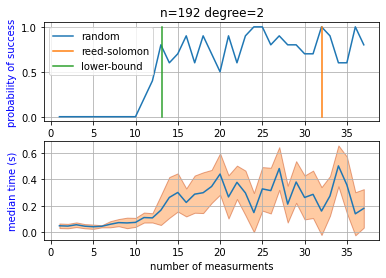

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.8, 0.9, 0.9, 1.0, 1.0, 0.9, 1.0, 0.9, 0.9, 0.9, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 0.9, 1.0, 1.0] [0.042717933654785156, 0.05364859104156494, 0.04499852657318115, 0.04302966594696045, 0.05833756923675537, 0.0625377893447876, 0.07440292835235596, 0.1431281566619873, 0.12427496910095215, 0.14078211784362793, 0.29140520095825195, 0.40143394470214844, 0.7535682916641235, 1.7377939224243164, 1.7817094326019287, 2.0246602296829224, 1.3402661085128784, 2.2749459743499756, 1.788623332977295, 1.2668545246124268, 1.342584490776062, 1.024993658065796, 2.0204635858535767, 1.7080649137496948, 2.0731316804885864, 2.87054705619812, 1.4087204933166504, 2.3639825582504272, 2.545947790145874, 1.61472749710083, 1.6180710792541504, 2.0127782821655273, 1.6186015605926514, 2.350045919418335, 2.116339087486267, 3.019760012626648, 1.9768174886703491, 3.094312906265259, 2.075606107711792, 2.3916428089141846]


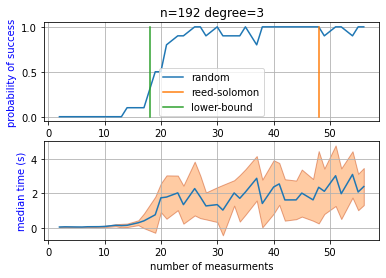

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.8, 0.9, 0.9, 1.0, 0.9, 0.9, 1.0, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0] [0.035889267921447754, 0.03742110729217529, 0.03184163570404053, 0.04315650463104248, 0.05960500240325928, 0.12825405597686768, 0.20926082134246826, 0.4649670124053955, 0.6406412124633789, 1.5860944986343384, 3.901158571243286, 5.541919827461243, 13.963865041732788, 19.054449796676636, 23.741252779960632, 20.188212394714355, 22.613112092018127, 34.45344424247742, 27.60808253288269, 25.41026782989502, 12.639344811439514, 22.978787899017334, 19.321548223495483, 13.715453743934631, 9.116610884666443, 11.30648398399353, 14.290605068206787, 17.359943389892578, 14.849841356277466, 21.7527197599411, 17.727901458740234, 11.270297884941101, 11.811702966690063, 7.127567291259766, 8.278298258781433, 6.607510447502136, 7.856192350387573, 9.243704319000244, 14.769444227218628, 7.343639373779297]


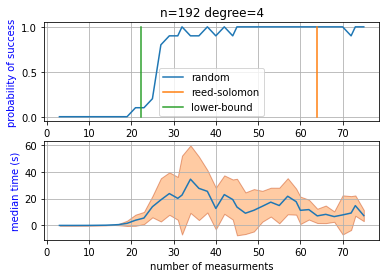

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.7, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.030086994171142578, 0.03381752967834473, 0.05094444751739502, 0.09818387031555176, 0.21727263927459717, 0.30492591857910156, 0.47488534450531006, 1.9421753883361816, 7.603044271469116, 18.139830470085144, 51.00301647186279, 100.1482527256012, 60.65002107620239, 238.5092649459839, 180.4166703224182, 119.73750114440918, 97.36775302886963, 120.42160475254059, 72.09005761146545, 65.95041859149933, 69.6786881685257, 52.49077093601227, 53.75312411785126, 55.35241138935089, 61.38699460029602, 71.30012357234955, 49.96291244029999, 54.46290969848633, 51.43734395503998, 65.53484809398651, 55.648175954818726, 50.67600083351135, 56.35221445560455, 50.68218910694122, 50.22831726074219, 52.19108772277832, 47.079434871673584, 44.73226010799408, 40.793702244758606, 37.06073009967804]


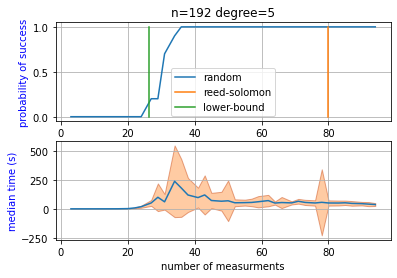

In [44]:
# Random measurements plot results
for n in result:
    for degree in result[n]:
        no_measurements , p_success, time, std  = [], [], [], []
        for m in result[n][degree]:
            p = sum([1 for j in range(10) if result[n][degree][m][j]["equal"]==True])/10
            no_measurements.append(m)
            p_success.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(10)]))
            std.append(np.std([result[n][degree][m][j]["time"] for j in range(10)]))
        print(p_success,time)
        time = np.array(time)
        std = np.array(std)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_success, label="random")
        ax1.plot( [2*degree*math.ceil(np.log2(n+1))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        plt.fill_between(no_measurements, time-std, time+std, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
        plt.show()
        
           

In [49]:
# Binning and reed-solomon load the results
from math import ceil 
result_binning = {}
result_reedsolomon = {}
for n in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
    n = 3*n // 2
    result_binning[n] = {}
    for degree in [2, 3, 4, 5, 6, 7, 8, 10, 20]:
        result_binning[n][degree] = {}
        no_bins_range = np.linspace(0.2 * degree ** 2 if degree < 10 else 0.05 * degree ** 2,
                                    degree ** 2 if degree < 10 else 0.5 * degree ** 2, 10)
        no_bins_range = [ceil(a) for a in no_bins_range]
        for no_bins in no_bins_range:
            for no_iterations in [1,2,3]:
                for ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                    for try_no in range(10):
                        with open(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json") as f:
                            try:
                                data = json.loads(f.read())
                                m = data["measurements"]
                                try:
                                    result_binning[n][degree][m].append(data)
                                except:
                                    result_binning[n][degree][m] = [data]
                            except:
                                print(f"couldn't find results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json")
       
            
for n in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
    n = 3*n//2
    result_reedsolomon[n] = {}
    for degree in [2,  4, 6, 8,10, 20]:
        with open(f"results3/n={n}_d={degree}.json") as f:
            data = json.loads(f.read())
            result_reedsolomon[n][degree] = {"measurements": data["measurements"], "times":data["times"]}

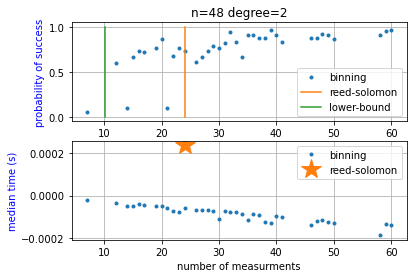

KeyError: 3

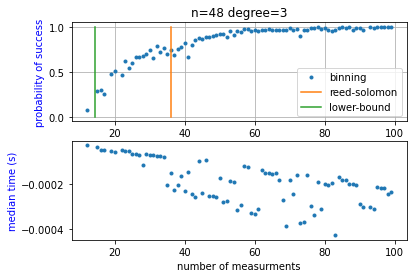

In [48]:
# Binning and reed-solomon plot the results
for n in result_binning:
    for degree in result_binning[n]:
        no_measurements , p_success, times  = [], [], []
        for m in result_binning[n][degree]:
            l = len(result_binning[n][degree][m])
            p, time = max([(result_binning[n][degree][m][index]["p_success"], -result_binning[n][degree][m][index]["time_median"])for index in range(l)])
            time = -time 
            #p = sum([1 for j in range(l) if result_binning[n][degree][m][j]["status"]==True])/l
            #if l>=8 and p==1:
            #    print(l,p,m)
            no_measurements.append(m)
            p_success.append(p)
            times.append(-time)
        
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_success, ".", label="binning")
        ax1.plot([2*degree*math.ceil(np.log2(n+1))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, times, ".", label="binning")
        ax2.plot(result_reedsolomon[n][degree]["measurements"], np.median(result_reedsolomon[n][degree]["times"]), "*", markersize=20, label="reed-solomon")
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        ax2.legend()
        plt.savefig(f"images/binning/n={n}_d={degree}", dpi=300)
        
        plt.show()
           